 Maiores Informações: https://github.com/google-research/arco-era5?tab=readme-ov-file

# Instalações necessárias

In [1]:
# conda install -c conda-forge zarr
# pip install gcsfs

# Carregandos os dados
- 0.25° Pressure and Surface Level Data- 
This dataset contains most pressure-level fields and all surface-level field regridded to a uniform 0.25° resolution. It is a superset of the data used to train GraphCast and NeuralGCM.

In [3]:
import time

In [14]:
%%time

# carrega os dados
import xarray as xr
ar_full_37_1h = xr.open_zarr('gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
                             chunks=None,
                             storage_options=dict(token='anon'))

# transforma longitude de 0-360 graus para -180-180 graus
ar_full_37_1h.coords['longitude'] = ((ar_full_37_1h.coords['longitude'] + 180) % 360) - 180
ar_full_37_1h = ar_full_37_1h.sortby(ar_full_37_1h.longitude)
ar_full_37_1h

CPU times: total: 125 ms
Wall time: 575 ms


<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 1089144,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 ...
    zero_degree_level                                                (time, latitude, longitude) float32 ...

# Variáveis e tempos disponíveis

In [9]:
ar_full_37_1h.data_vars

Data variables:
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_wind_gust_since_previous_post_processing                     (time, latitude, longitude) float32 ...
    2m_dewpoint_temperature                                          (time, latitude, longitude) float32 ...
    2m_temperature                                                   (time, latitude, longitude) float32 ...
   

In [26]:
len(ar_full_37_1h.data_vars)

273

In [10]:
ar_full_37_1h.time

<xarray.DataArray 'time' (time: 1089144)>
array(['1900-01-01T00:00:00.000000000', '1900-01-01T01:00:00.000000000',
       '1900-01-01T02:00:00.000000000', ..., '2024-03-31T21:00:00.000000000',
       '2024-03-31T22:00:00.000000000', '2024-03-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 ... 2024-03-31T23:00:00

# Mapas simples

In [15]:
# acessando CAPE
ar_full_37_1h['convective_available_potential_energy']

<xarray.DataArray 'convective_available_potential_energy' (time: 1089144,
                                                           latitude: 721,
                                                           longitude: 1440)>
[1130792866560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 1900-01-01 ... 2024-03-31T23:00:00
Attributes:
    long_name:   Convective available potential energy
    short_name:  cape
    units:       J kg**-1

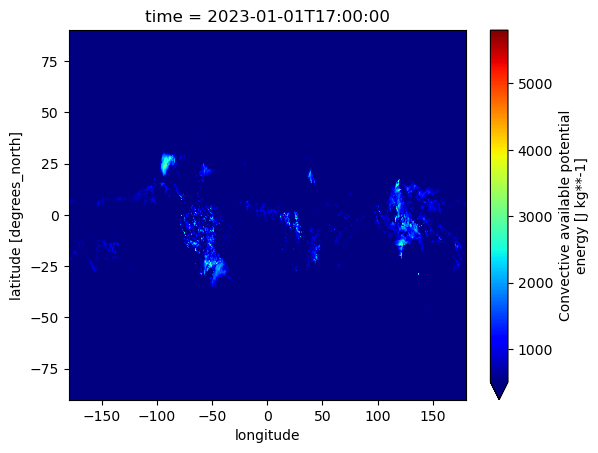

In [24]:
# mapa de CAPE para uma DATA específica: 1 de janeiro de 2023 às 17 UTC
ar_full_37_1h['convective_available_potential_energy'].sel(time='2023-01-01T17').plot(vmin=500, cmap='jet')

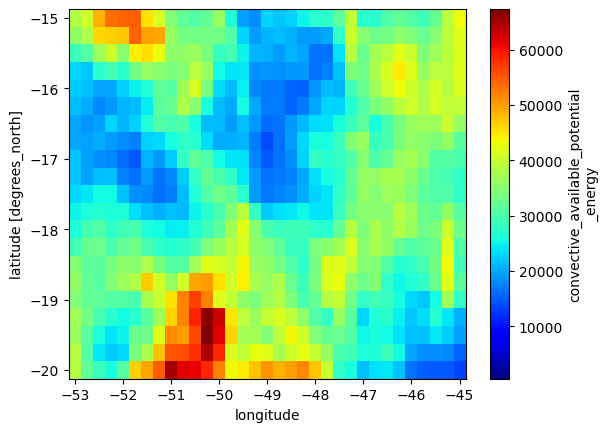

In [25]:
# mapa de CAPE para uma DATA e REGIÃO específica
ar_full_37_1h['convective_available_potential_energy'].sel(time=slice('2024-01-01','2024-01-03'), 
                                                           longitude=slice(-53, -45), 
                                                           latitude=slice(-15, -20)).sum('time').plot(vmin=500, cmap='jet')

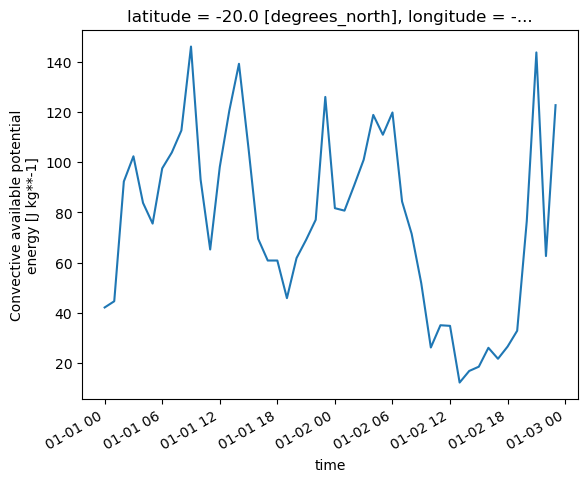

In [22]:
# extrai a SÉRIE TEMPORAL de CAPE para uma localidade
rec = ar_full_37_1h['convective_available_potential_energy'].sel(time=slice('2024-01-01','2024-01-02'))

rec.sel(longitude=-40,
        latitude=-20.0,
        method='nearest').plot()